# Discovery and Data Selection

Partendo dai dataset relativi agli ultimi 10 anni di storico di questi indic(file sp500.csv per l’indice americano e euro50.csv per l’indice europeo), calcolare:


* il rendimento percentuale mensile (inteso su 20 giorni di borsa) e annuale (inteso su 252 giorni di borsa), distinto per indice
* il rendimento medio giornaliero distinto per indice e per giorno della settimana
individuare il giorno di maggiore rendimento giornaliero e di minore rendimento, distinto tra i due indici
* Calcolare il volume medio giornaliero dei due indici








In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import calendar
from matplotlib.ticker import FuncFormatter
sns.set(style='whitegrid')
%matplotlib inline

In [ ]:
df_euro50 = pd.read_csv("https://drive.google.com/uc?id=1BwYroL994llOrEu5_XmuGmLsQw_41AUO")
df_euro50.head(5)

,Date,Open,High,Low,Close,Volume
0,2014-04-15 00:00:00+02:00,3130.149902,3139.659912,3091.189941,3091.520020,59163400
1,2014-04-16 00:00:00+02:00,3116.459961,3139.260010,3113.469971,3139.260010,63114700
2,2014-04-17 00:00:00+02:00,3140.120117,3156.639893,3121.820068,3155.810059,66521300
3,2014-04-22 00:00:00+02:00,3161.689941,3201.250000,3157.399902,3199.689941,49270000
4,2014-04-23 00:00:00+02:00,3197.389893,3198.600098,3175.219971,3175.969971,48916800


In [ ]:
df_sp500 = pd.read_csv("https://drive.google.com/uc?id=1L16kcdAQ33NJZPGvkyN6ly_PFO6eFOBD")
df_sp500.head(5)

,Date,Open,High,Low,Close,Volume
0,2014-04-15 00:00:00-04:00,153.202298,154.046360,151.689653,153.937714,157093000
1,2014-04-16 00:00:00-04:00,154.999072,155.558996,154.313784,155.550644,105197000
2,2014-04-17 00:00:00-04:00,155.341722,156.202502,155.074289,155.767929,105255000
3,2014-04-21 00:00:00-04:00,155.809663,156.361234,155.617453,156.311081,68329000
4,2014-04-22 00:00:00-04:00,156.469867,157.447646,156.386304,157.021439,85790000


# Data Cleaning and Trasformation

In [ ]:
print(f'Date in df_euro50 duplicate: {df_euro50.Date.duplicated().sum()}')
print(f'Date in df_sp500 duplicate: {df_sp500.Date.duplicated().sum()}')

Date in df_euro50 duplicate: 0
Date in df_sp500 duplicate: 0


In [ ]:
df_euro50.info()
print('\n')
df_sp500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2512 non-null   object 
 1   Open    2512 non-null   float64
 2   High    2512 non-null   float64
 3   Low     2512 non-null   float64
 4   Close   2512 non-null   float64
 5   Volume  2512 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 117.9+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2517 non-null   object 
 1   Open    2517 non-null   float64
 2   High    2517 non-null   float64
 3   Low     2517 non-null   float64
 4   Close   2517 non-null   float64
 5   Volume  2517 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 118.1+ KB


In [ ]:
#converto da stringa a datetime la colonna Date
df_euro50['Date'] = pd.to_datetime(df_euro50['Date'], format='ISO8601',utc=True).dt.normalize()
df_sp500['Date'] = pd.to_datetime(df_sp500['Date'], format='ISO8601',utc=True).dt.normalize()

In [ ]:
df_euro50 = df_euro50.sort_values(by='Date')
df_euro50.head(5)

,Date,Open,High,Low,Close,Volume
0,2014-04-14 00:00:00+00:00,3130.149902,3139.659912,3091.189941,3091.520020,59163400
1,2014-04-15 00:00:00+00:00,3116.459961,3139.260010,3113.469971,3139.260010,63114700
2,2014-04-16 00:00:00+00:00,3140.120117,3156.639893,3121.820068,3155.810059,66521300
3,2014-04-21 00:00:00+00:00,3161.689941,3201.250000,3157.399902,3199.689941,49270000
4,2014-04-22 00:00:00+00:00,3197.389893,3198.600098,3175.219971,3175.969971,48916800


In [ ]:
df_sp500 = df_sp500.sort_values(by='Date')
df_sp500.head(5)

,Date,Open,High,Low,Close,Volume
0,2014-04-15 00:00:00+00:00,153.202298,154.046360,151.689653,153.937714,157093000
1,2014-04-16 00:00:00+00:00,154.999072,155.558996,154.313784,155.550644,105197000
2,2014-04-17 00:00:00+00:00,155.341722,156.202502,155.074289,155.767929,105255000
3,2014-04-21 00:00:00+00:00,155.809663,156.361234,155.617453,156.311081,68329000
4,2014-04-22 00:00:00+00:00,156.469867,157.447646,156.386304,157.021439,85790000


In [ ]:
#controllo della coerenza dell' indice low,high e close
print(sum(df_sp500.High<df_sp500.Low))
print(sum(df_sp500.Close<df_sp500.Low)+sum(df_sp500.Open<df_sp500.Low))
print(sum(df_sp500.Close>df_sp500.High)+sum(df_sp500.Open>df_sp500.High))

print(sum(df_euro50.High<df_euro50.Low))
print(sum(df_euro50.Close<df_euro50.Low)+sum(df_euro50.Open<df_euro50.Low))
print(sum(df_euro50.Close>df_euro50.High)+sum(df_euro50.Open>df_euro50.High))

0
0
0
0
0
0


In [ ]:
df_sp500.describe()

,Open,High,Low,Close,Volume
count,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03
mean,288.681508,290.271015,286.973003,288.740224,9.128904e+07
std,101.167582,101.786490,100.516270,101.200970,4.570609e+07
min,153.202298,154.046360,151.689653,153.937714,8.372180e+06
25%,190.363430,190.905818,189.663299,190.428207,6.235830e+07
50%,262.118824,263.595099,260.394405,262.737061,7.929390e+07
75%,388.344756,391.171649,384.777956,388.540436,1.054429e+08
max,523.830017,524.609985,522.780029,523.169983,5.072443e+08


In [ ]:
df_euro50.describe()

,Open,High,Low,Close,Volume
count,2512.000000,2512.000000,2512.000000,2512.000000,2.512000e+03
mean,3571.883194,3595.150499,3547.638109,3572.171145,4.193444e+07
std,459.604033,458.528795,461.980153,460.763910,1.907896e+07
min,2388.939941,2461.570068,2302.840088,2385.820068,0.000000e+00
25%,3244.664978,3269.692505,3226.249939,3246.219971,2.967560e+07
50%,3486.239990,3506.835083,3465.694946,3488.714966,3.749665e+07
75%,3827.487488,3848.577515,3799.049988,3828.907532,4.997290e+07
max,5096.859863,5121.709961,5081.779785,5083.419922,2.358453e+08


In [ ]:
#si evidenzia la presenza di volumi a 0, un problema di qualità del dato
df_euro50[df_euro50['Volume']<(1*10**7)]

,Date,Open,High,Low,Close,Volume
1011,2018-04-26 00:00:00+00:00,3510.280029,3522.590088,3503.590088,3518.780029,0
1058,2018-07-05 00:00:00+00:00,3449.500000,3453.909912,3430.310059,3448.489990,0
1063,2018-07-12 00:00:00+00:00,3454.290039,3466.260010,3447.870117,3454.540039,0
1082,2018-08-09 00:00:00+00:00,3486.310059,3486.310059,3413.679932,3426.280029,0
1104,2018-09-10 00:00:00+00:00,3313.090088,3318.590088,3286.969971,3311.659912,0
1113,2018-09-23 00:00:00+00:00,3426.850098,3426.850098,3405.419922,3410.439941,0
1125,2018-10-09 00:00:00+00:00,3321.590088,3321.590088,3266.229980,3266.899902,0
1136,2018-10-24 00:00:00+00:00,3126.689941,3166.439941,3107.879883,3164.399902,0
1144,2018-11-05 00:00:00+00:00,3219.080078,3222.590088,3197.139893,3207.419922,0
1194,2019-01-22 00:00:00+00:00,3104.080078,3132.790039,3094.479980,3112.129883,0


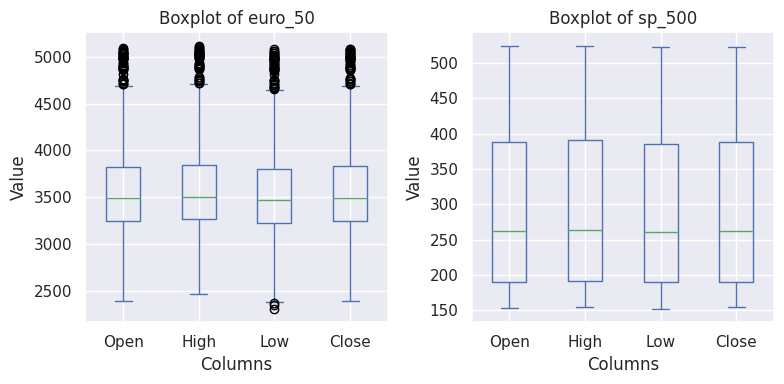

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

df_euro50[df_euro50.columns[0:5]].plot(kind='box', ax=axs[0])
axs[0].set_title('Boxplot of euro_50')
axs[0].set_ylabel('Value')
axs[0].set_xlabel('Columns')

df_sp500[df_sp500.columns[0:5]].plot(kind='box', ax=axs[1])
axs[1].set_title('Boxplot of sp_500')
axs[1].set_ylabel('Value')
axs[1].set_xlabel('Columns')

plt.tight_layout()

# Data Analysis

Mi ricavo i nomi dei mesi con le librerie datetime e calendar:

In [ ]:
df_sp500['Month'] = df_sp500['Date'].dt.month.apply(lambda x: calendar.month_name[x])
df_euro50['Month'] = df_euro50['Date'].dt.month.apply(lambda x: calendar.month_name[x])

Calcolo il rendimento mensile escludendo:

*   Aprile 2014, in quanto non comparabile
*   Maggio 2014, non comparabile con Aprile 2014 perchè incompleto
*   Aprile 2024 perchè non ci sono 20 giorni di borsa


Calcolo il rendimento annuale escludendo:

*   il 2014 non comparabile
*   il 2015 non comparabile col 2014 perchè incompleto
*   il 2024 perchè incompleto

S&P 500

Monthly Total Return

In [ ]:
#ricavo l'ultima riga da ogni mese e le metto in una lista
last_day_of_month = []
years = df_sp500.Date.dt.year.unique()

for y in years:
  months = df_sp500[df_sp500["Date"].dt.year==y].Month.unique()
  for x in months:
    last_day_of_month.append(df_sp500[(df_sp500['Month']==x) & (df_sp500["Date"].dt.year==y)][['Date','Month','Close']].iloc[-1])

In [ ]:
#creo un df con la lista e successivamente mi calcolo il rendimento mensile
df_monthly_yield_sp500 = pd.DataFrame(last_day_of_month, columns=['Date', 'Month', 'Close']).reset_index(drop=True)

monthly_yield_sp500 = (df_monthly_yield_sp500.Close.iloc[2:-1].values - df_monthly_yield_sp500.Close.iloc[1:-2].values) / df_monthly_yield_sp500.Close.iloc[1:-2].values *100

In [ ]:
#elimino i primi due mesi e ultimo mese dal df
df_monthly_yield_sp500 = df_monthly_yield_sp500.iloc[2:-1]

In [ ]:
df_monthly_yield_sp500['Yield'] = np.round(monthly_yield_sp500,3)
df_monthly_yield_sp500

,Date,Month,Close,Yield
2,2014-06-30 00:00:00+00:00,June,164.348846,2.065
3,2014-07-31 00:00:00+00:00,July,162.140381,-1.344
4,2014-08-29 00:00:00+00:00,August,168.539032,3.946
5,2014-09-30 00:00:00+00:00,September,166.213760,-1.380
6,2014-10-31 00:00:00+00:00,October,170.128296,2.355
...,...,...,...,...
115,2023-11-30 00:00:00+00:00,November,453.149078,9.134
116,2023-12-29 00:00:00+00:00,December,473.837769,4.566
117,2024-01-31 00:00:00+00:00,January,481.384338,1.593
118,2024-02-29 00:00:00+00:00,February,506.506256,5.219


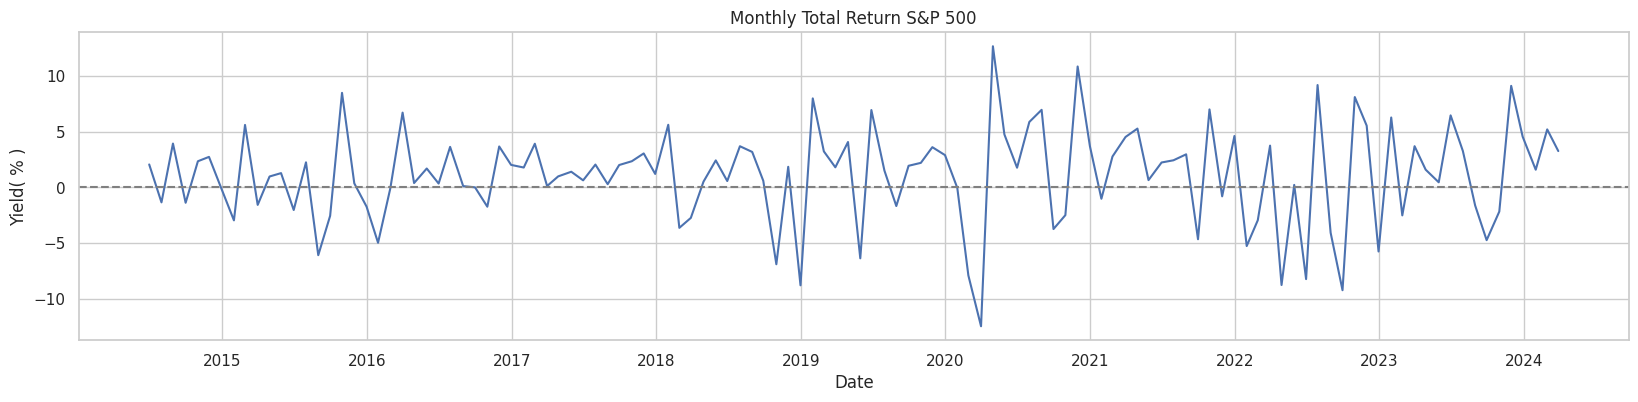

In [ ]:
plt.figure(figsize=(20,4))
sns.lineplot(x = df_monthly_yield_sp500['Date'].dt.date,y = df_monthly_yield_sp500['Yield'])
plt.axhline(y=0, color='grey', linestyle='--')
plt.title('Monthly Total Return S&P 500')
plt.xlabel('Date')
plt.ylabel('Yield( % )')
plt.show()

Annual Total Return

In [ ]:
#ricavo l'ultima riga da ogni anno e le metto in una lista
last_day_of_year = []
years = df_sp500.Date.dt.year.unique()

for y in years:
  last_day_of_year.append(df_sp500[df_sp500['Date'].dt.year==y][['Date','Close']].iloc[-1])

In [ ]:
#creo il df dalla lista
df_annual_yield_sp500 = pd.DataFrame(last_day_of_year, columns=['Date',  'Close']).reset_index(drop=True)

In [ ]:
#calcolo il rendimento annuo
annual_yield_sp500 = (df_annual_yield_sp500.Close.iloc[2:-1].values - df_annual_yield_sp500.Close.iloc[1:-2].values) / df_annual_yield_sp500.Close.iloc[1:-2].values *100

In [ ]:
#elimino il 2014,2015 e 2024 dal df
df_annual_yield_sp500 = df_annual_yield_sp500.iloc[2:-1]

In [ ]:
df_annual_yield_sp500['Yield'] = np.round(annual_yield_sp500,3)

In [ ]:
df_annual_yield_sp500

,Date,Close,Yield
2,2016-12-30 00:00:00+00:00,197.688278,11.998
3,2017-12-29 00:00:00+00:00,240.597305,21.705
4,2018-12-31 00:00:00+00:00,229.604462,-4.569
5,2019-12-31 00:00:00+00:00,301.295776,31.224
6,2020-12-31 00:00:00+00:00,356.528259,18.332
7,2021-12-31 00:00:00+00:00,458.954437,28.729
8,2022-12-30 00:00:00+00:00,375.537781,-18.175
9,2023-12-29 00:00:00+00:00,473.837769,26.176


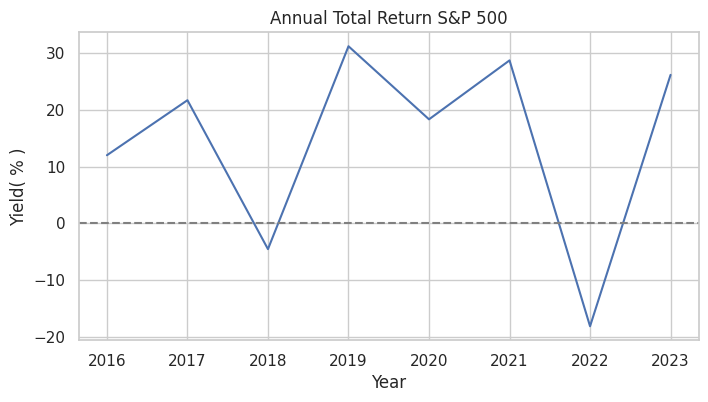

In [ ]:
plt.figure(figsize=(8,4))
sns.lineplot(x = df_annual_yield_sp500['Date'].dt.year,y = df_annual_yield_sp500['Yield'])
plt.axhline(y=0, color='grey', linestyle='--')
plt.title('Annual Total Return S&P 500')
plt.xlabel('Year')
plt.ylabel('Yield( % )')
plt.show()

EURO STOXX 50

Monthly Total Return

In [ ]:
#ricavo l'ultima riga da ogni mese e le metto in una lista
last_day_of_month = []
years = df_euro50.Date.dt.year.unique()

for y in years:
  months = df_euro50[df_euro50["Date"].dt.year==y].Month.unique()
  for x in months:
    last_day_of_month.append(df_euro50[(df_euro50['Month']==x) & (df_euro50["Date"].dt.year==y)][['Date','Month','Close']].iloc[-1])

In [ ]:
#creo un df con la lista e successivamente mi calcolo il rendimento mensile
df_monthly_yield_euro50 = pd.DataFrame(last_day_of_month, columns=['Date', 'Month', 'Close']).reset_index(drop=True)

monthly_yield_euro50 = (df_monthly_yield_euro50.Close.iloc[2:-1].values - df_monthly_yield_euro50.Close.iloc[1:-2].values) / df_monthly_yield_euro50.Close.iloc[1:-2].values *100

In [ ]:
#elimino i primi 2 mesi e l'ultimo mese dal df
df_monthly_yield_euro50 = df_monthly_yield_euro50.iloc[2:-1]

In [ ]:
df_monthly_yield_euro50['Yield'] = np.round(monthly_yield_euro50,3)

In [ ]:
df_monthly_yield_euro50

,Date,Month,Close,Yield
2,2014-06-30 00:00:00+00:00,June,3258.709961,0.435
3,2014-07-30 00:00:00+00:00,July,3115.510010,-4.394
4,2014-08-31 00:00:00+00:00,August,3175.050049,1.911
5,2014-09-30 00:00:00+00:00,September,3195.080078,0.631
6,2014-10-30 00:00:00+00:00,October,3113.320068,-2.559
...,...,...,...,...
115,2023-11-30 00:00:00+00:00,November,4418.509766,7.987
116,2023-12-28 00:00:00+00:00,December,4521.649902,2.334
117,2024-01-31 00:00:00+00:00,January,4638.600098,2.586
118,2024-02-29 00:00:00+00:00,February,4894.859863,5.525


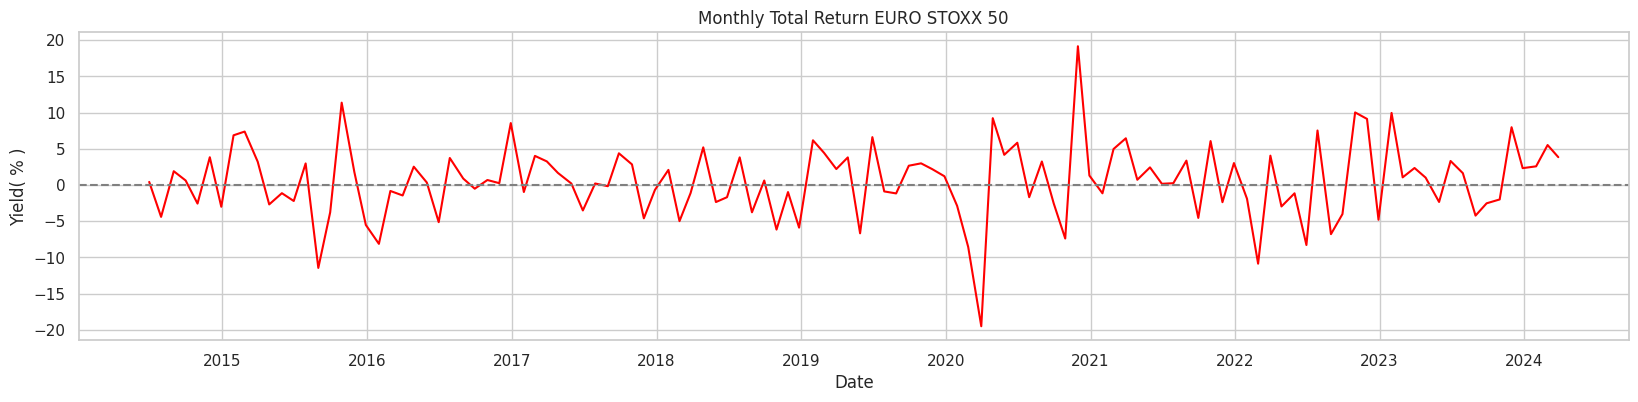

In [ ]:
plt.figure(figsize=(20,4))
sns.lineplot(x = df_monthly_yield_euro50['Date'].dt.date,y = df_monthly_yield_euro50['Yield'],color='red')
plt.axhline(y=0, color='grey', linestyle='--')
plt.title('Monthly Total Return EURO STOXX 50')
plt.xlabel('Date')
plt.ylabel('Yield( % )')
plt.show()

Annual Total Return

In [ ]:
#ricavo l'ultima riga da ogni anno e le metto in una lista
last_day_of_year = []
years = df_euro50.Date.dt.year.unique()

for y in years:
  last_day_of_year.append(df_euro50[df_euro50['Date'].dt.year==y][['Date','Close']].iloc[-1])

In [ ]:
#creo il df dalla lista
df_annual_yield_euro50 = pd.DataFrame(last_day_of_year, columns=['Date',  'Close']).reset_index(drop=True)

In [ ]:
#calcolo il rendimento annuo
annual_yield_euro50 = (df_annual_yield_euro50.Close.iloc[2:-1].values - df_annual_yield_euro50.Close.iloc[1:-2].values) / df_annual_yield_euro50.Close.iloc[1:-2].values *100

In [ ]:
#elimino il 2014,2015 e 2024 dal df
df_annual_yield_euro50 = df_annual_yield_euro50.iloc[2:-1]

In [ ]:
df_annual_yield_euro50['Yield'] = np.round(annual_yield_euro50,3)

In [ ]:
df_annual_yield_euro50

,Date,Close,Yield
2,2016-12-29 00:00:00+00:00,3290.520020,0.077
3,2017-12-28 00:00:00+00:00,3503.959961,6.487
4,2018-12-27 00:00:00+00:00,2986.530029,-14.767
5,2019-12-29 00:00:00+00:00,3748.469971,25.513
6,2020-12-29 00:00:00+00:00,3571.590088,-4.719
7,2021-12-29 00:00:00+00:00,4306.069824,20.565
8,2022-12-29 00:00:00+00:00,3793.620117,-11.901
9,2023-12-28 00:00:00+00:00,4521.649902,19.191


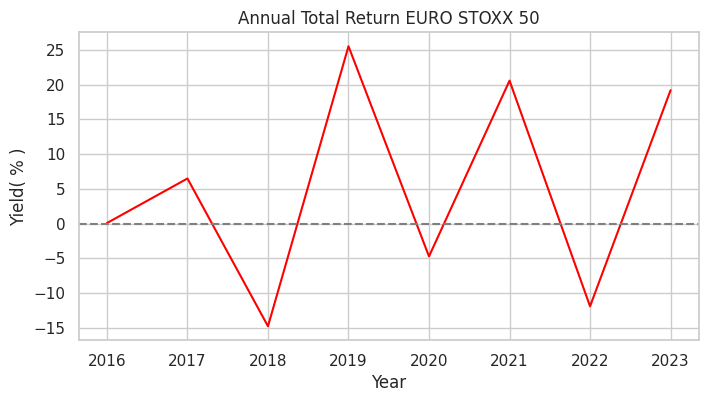

In [ ]:
plt.figure(figsize=(8,4))
sns.lineplot(x = df_annual_yield_euro50['Date'].dt.year,y = df_annual_yield_euro50['Yield'],color='red')
plt.axhline(y=0, color='grey', linestyle='--')
plt.title('Annual Total Return EURO STOXX 50')
plt.xlabel('Year')
plt.ylabel('Yield( % )')
plt.show()

Average Daily Yield

Calcolo prima il rendimendo giornaliero per gli indici (salto il primo giorno di rendimento non calcolabile) e mi creo un DataFrame con nome dei giorni e rendimento giornaliero:

In [ ]:
dayli_yield_sp500 = (df_sp500.Close.iloc[1:].values - df_sp500.Close.iloc[:-1].values) / df_sp500.Close.iloc[:-1].values*100
print(dayli_yield_sp500)

dayli_yield_euro50 = (df_euro50.Close.iloc[1:].values - df_euro50.Close.iloc[:-1].values) / df_euro50.Close.iloc[:-1].values*100
print(dayli_yield_euro50)

[ 1.04778112  0.13968773  0.34869299 ...  0.75468858 -1.3803077
  0.78888103]
[ 1.54422387  0.52719586  1.39044752 ... -0.68288468 -0.23497406
  1.40403987]


In [ ]:
df_yield_sp500 = pd.DataFrame({'Date':df_sp500.Date.iloc[1:].values,'Yield' :np.round(dayli_yield_sp500,4)})
df_yield_euro50 = pd.DataFrame({'Date':df_euro50.Date.iloc[1:].values,'Yield' :np.round(dayli_yield_euro50,4)})

Mi ricavo i giorni della settimana con le librerie datetime e calendar:

In [ ]:
df_yield_sp500['Weekday'] = df_yield_sp500['Date'].dt.weekday.apply(lambda x: calendar.day_name[x])
df_yield_euro50['Weekday'] = df_yield_euro50['Date'].dt.weekday.apply(lambda x: calendar.day_name[x])

Mi calcolo il rendimento medio giornaliero diviso per indice e giorno della settimana:

S&P 500

In [ ]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

avg_dayli_yield_sp500 = round(df_yield_sp500.groupby(by='Weekday').Yield.mean().reindex(days),4)
print(f"Il rendimento giornaliero medio dell'indice S&P 500 è:\n  {avg_dayli_yield_sp500}")

Il rendimento giornaliero medio dell'indice S&P 500 è:
  Weekday
Monday       0.0483
Tuesday      0.0516
Wednesday    0.0789
Thursday     0.0388
Friday       0.0520
Saturday        NaN
Sunday          NaN
Name: Yield, dtype: float64


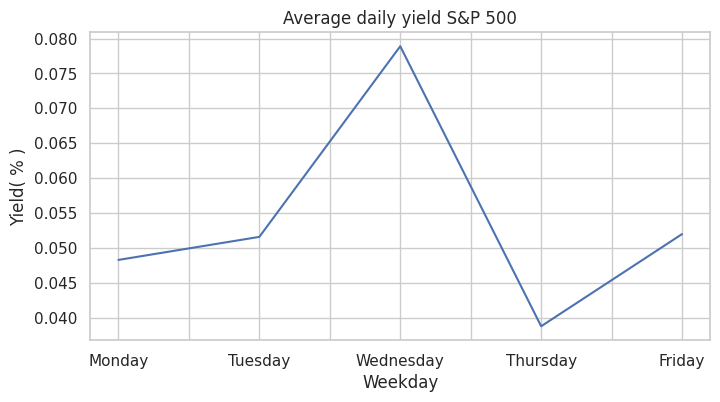

In [ ]:
plt.figure(figsize=(8, 4))
avg_dayli_yield_sp500.dropna().plot(kind='line')
plt.title('Average daily yield S&P 500')
plt.xlabel('Weekday')
plt.ylabel('Yield( % )')
plt.show()

EURO STOXX 50

In [ ]:
avg_dayli_yield_euro50 = round(df_yield_euro50.groupby(by='Weekday').Yield.mean().reindex(days),4)
print(f"\nIl rendimento giornaliero medio dell'indice EURO STOXX 50 è:\n {avg_dayli_yield_euro50}")


Il rendimento giornaliero medio dell'indice EURO STOXX 50 è:
 Weekday
Monday       0.1085
Tuesday      0.0987
Wednesday   -0.0471
Thursday     0.0162
Friday          NaN
Saturday        NaN
Sunday      -0.0472
Name: Yield, dtype: float64


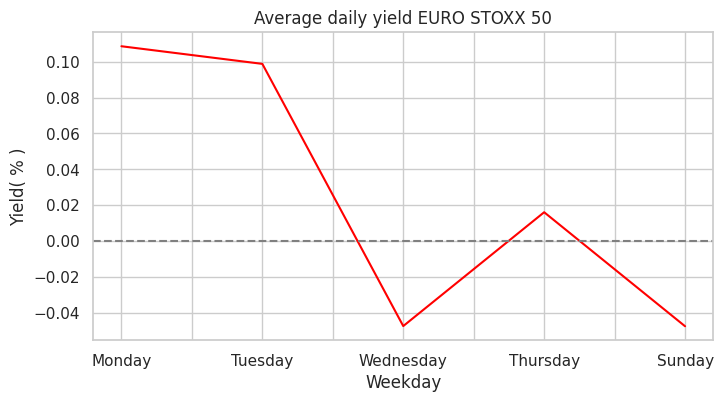

In [ ]:
plt.figure(figsize=(8, 4))
avg_dayli_yield_euro50.dropna().plot(kind='line',color='red')
plt.axhline(y=0, color='grey', linestyle='--')
plt.title('Average daily yield EURO STOXX 50')
plt.xlabel('Weekday')
plt.ylabel('Yield( % )')
plt.show()

Day of Higher and Lower Daily Yield

S&P 500

In [ ]:
max_dayli_yield_sp500 = df_yield_sp500.loc[df_yield_sp500.Yield.idxmax()]
min_dayli_yield_sp500 = df_yield_sp500.loc[df_yield_sp500.Yield.idxmin()]
print(f"Il giorno di rendimento MASSIMO dell'indice S&P 500 è :\n{max_dayli_yield_sp500}")
print(f"\nIl giorno di MINIMO minimo dell'indice S&P 500 è :\n{min_dayli_yield_sp500}")

Il giorno di rendimento MASSIMO dell'indice S&P 500 è :
Date       2020-03-24 00:00:00
Yield                   9.0603
Weekday                Tuesday
Name: 1494, dtype: object

Il giorno di MINIMO minimo dell'indice S&P 500 è :
Date       2020-03-16 00:00:00
Yield                 -10.9424
Weekday                 Monday
Name: 1488, dtype: object


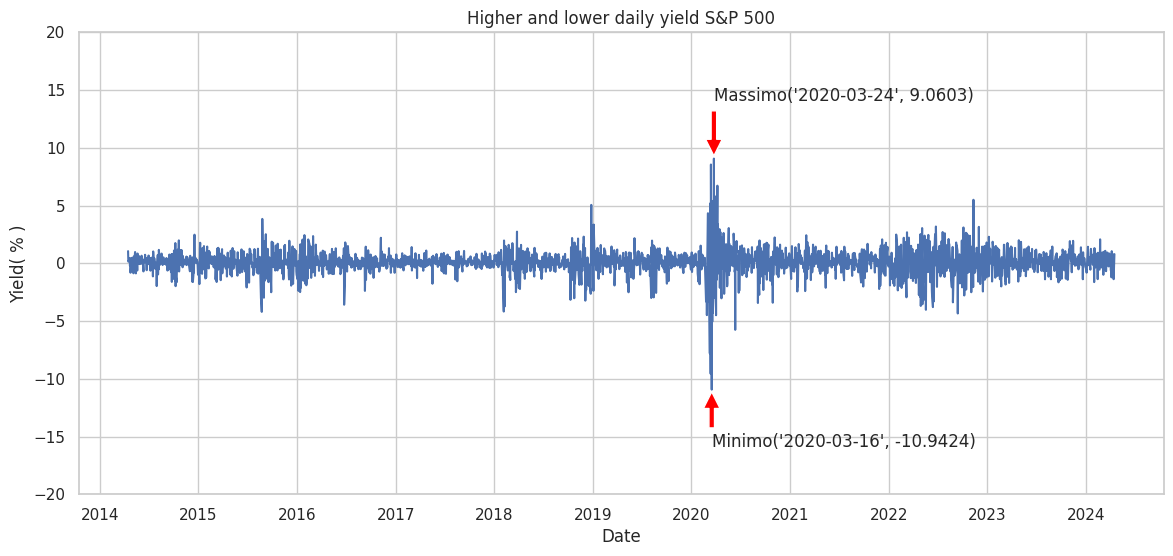

In [ ]:
plt.figure(figsize=(14, 6))
sns.lineplot(x = df_yield_sp500['Date'],y = df_yield_sp500['Yield'])
plt.annotate(f'Massimo{max_dayli_yield_sp500[0].strftime("%Y-%m-%d"),max_dayli_yield_sp500[1]}',
             xy=(max_dayli_yield_sp500[0], max_dayli_yield_sp500[1]),
             xytext=(max_dayli_yield_sp500[0], max_dayli_yield_sp500[1] + 5),
             arrowprops=dict(facecolor='red', shrink=0.05),
             )
plt.annotate(f'Minimo{min_dayli_yield_sp500[0].strftime("%Y-%m-%d"),min_dayli_yield_sp500[1]}',
             xy=(min_dayli_yield_sp500[0], min_dayli_yield_sp500[1]),
             xytext=(min_dayli_yield_sp500[0], min_dayli_yield_sp500[1] -5),
             arrowprops=dict(facecolor='red', shrink=0.05),
             )
plt.ylim(-20, 20)
plt.title('Higher and lower daily yield S&P 500')
plt.xlabel('Date')
plt.ylabel('Yield( % )')
plt.show()

EURO STOXX 50

In [ ]:
max_dayli_yield_euro50 = df_yield_euro50.loc[df_yield_euro50.Yield.idxmax()]
min_dayli_yield_euro50 = df_yield_euro50.loc[df_yield_euro50.Yield.idxmin()]
print(f"Il giorno di rendimento MASSIMO dell'indice EURO STOXX 50 è :\n{max_dayli_yield_euro50}")
print(f"\nIl giorno di rendimento MINIMO dell'indice EURO STOXX 50 è :\n{min_dayli_yield_euro50}")

Il giorno di rendimento MASSIMO dell'indice EURO STOXX 50 è :
Date       2020-03-23 00:00:00
Yield                   9.2362
Weekday                 Monday
Name: 1485, dtype: object

Il giorno di rendimento MINIMO dell'indice EURO STOXX 50 è :
Date       2020-03-11 00:00:00
Yield                 -12.4014
Weekday              Wednesday
Name: 1477, dtype: object


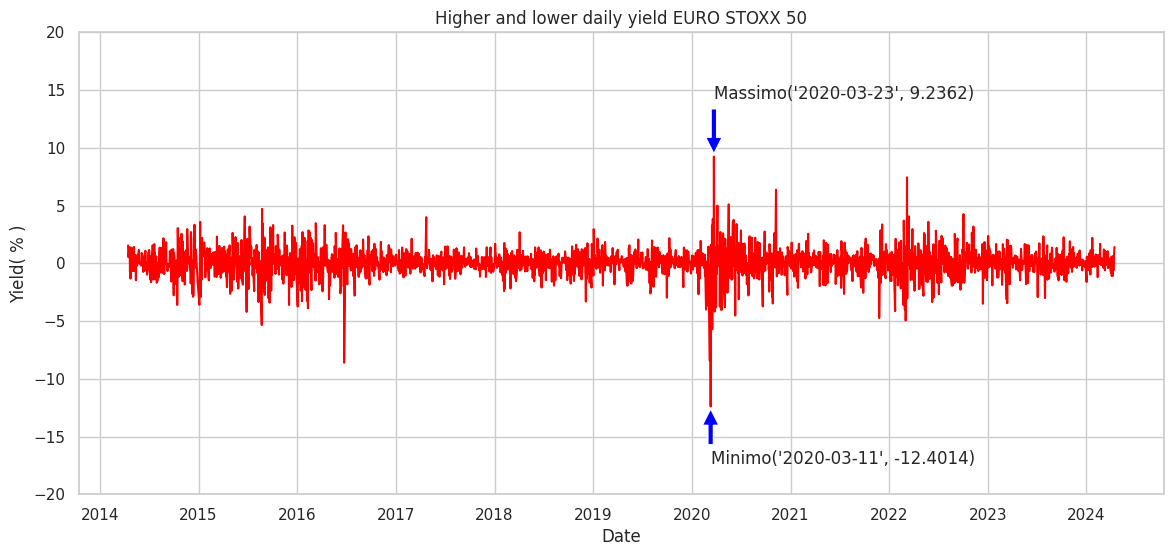

In [ ]:
plt.figure(figsize=(14, 6))
sns.lineplot(x = df_yield_euro50['Date'],y = df_yield_euro50['Yield'],color = 'red')
plt.annotate(f'Massimo{max_dayli_yield_euro50[0].strftime("%Y-%m-%d"),max_dayli_yield_euro50[1]}',
             xy=(max_dayli_yield_euro50[0], max_dayli_yield_euro50[1]),
             xytext=(max_dayli_yield_euro50[0], max_dayli_yield_euro50[1] + 5),
             arrowprops=dict(facecolor='blue', shrink=0.05),
             )
plt.annotate(f'Minimo{min_dayli_yield_euro50[0].strftime("%Y-%m-%d"),min_dayli_yield_euro50[1]}',
             xy=(min_dayli_yield_euro50[0], min_dayli_yield_euro50[1]),
             xytext=(min_dayli_yield_euro50[0], min_dayli_yield_euro50[1] -5),
             arrowprops=dict(facecolor='blue', shrink=0.05),
             )
plt.ylim(-20, 20)
plt.title('Higher and lower daily yield EURO STOXX 50')
plt.xlabel('Date')
plt.ylabel('Yield( % )')
plt.show()

Average Daily Volume

In [ ]:
avg_daily_volume_euro50 = round(df_euro50.Volume.mean())
print(f"Il volume giornaliero medio dell'indice EURO STOXX 50 è {avg_daily_volume_euro50}")

Il volume giornaliero medio dell'indice EURO STOXX 50 è 41934440


In [ ]:
avg_daily_volume_sp500 = round(df_sp500.Volume.mean())
print(f"Il volume giornaliero medio dell'indice S&P 500 è {avg_daily_volume_sp500}")

Il volume giornaliero medio dell'indice S&P 500 è 91289038


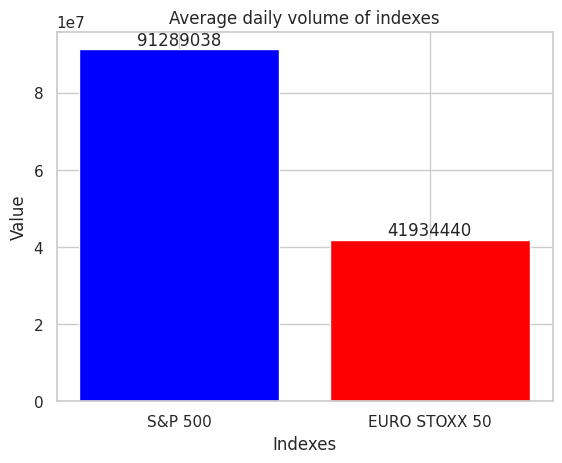

In [ ]:
plt.bar(['S&P 500','EURO STOXX 50'], [avg_daily_volume_sp500,avg_daily_volume_euro50], color=['blue', 'red'])
plt.title('Average daily volume of indexes')
plt.xlabel('Indexes')
plt.ylabel('Value')
for index, value in enumerate([avg_daily_volume_sp500, avg_daily_volume_euro50]):
    plt.text(index, value + 10000, str(value), ha='center', va='bottom')
plt.show()